# Logistic Regression

## Table of Contents:

1. [Classification](#Classification)
2. [Logistic Regression](#Logistic-Regression)
3. [Odds Ratios](#Odds-Ratios)
4. [ROC Curve](#ROC-Curve)
5. [Logistic Regression Example in SAS](#Logistic-Regression-Example-in-SAS)
6. [Summary](#Summary)
7. [Citations](#Citations)

### Classification

Classification involves sorting observations into discrete categories based on the values of the feature variables. For example, undegraduate college students can be sorted into "freshmen," "sophomores," "juniors," and "seniors". With information such as number of courses each student is taking, time per week spent applying to jobs/internships, and the time their alarm clock goes off in the morning (assuming freshmen classes start earlier than senior classes), we can make a model about what year each student is in. Binary classification sorts observations into two categories such as "success/failure" or "true/false."

**Logistic regression** is a type of regression that allows you to determine the relationship between two categories based on supplied feature variable values. For example, is someone likely more to be a Democrat or Republican based on that person's education, income, age, etc.?

[(back to top)](#Table-of-Contents:)

### Logistic Regression

We know from linear regression that the response variable $\widehat{y}$ can take on a wide range of continuous values. In logistic regression, however, we want to transform linear regression so that the response variable can only take on two values $0$ or $1$. The binary classification is coded into those two values, say Republicans are $0$ and Democrats are $1$.

The transformation from linear regression to logistic regression is achived through a **link function**. The specific link function that is used for logistic regression is known as the **logistic function**:

\begin{equation}
p \left(\widehat{y} \right) = \frac{1}{1 + e^{-\widehat{y}}}
\end{equation}

where $\widehat{y}$ is the predicted response value from linear regression.

A graph of this function is shown here:

<img src="files/images/logistic%20function.png">

The logistic function creates an "S"-shaped curve that has horiztonal asymptotes at $p \left(\widehat{y} \right) = 0$ and $p \left(\widehat{y} \right) = 1$. These represent the binary classification codings.

The logistic function can be interpreted as the probability of getting a binary classification of $1$ given the input $\widehat{y}$. Therefore, if $p \left(\widehat{y} \right) = 0.7$ then we can say the probabilty of obtaining the binary classification of $1$ for this observation is $0.7$, and conversely, the probability of getting the binary classification of $0$ is $0.3$. Similarly, if $p \left(\widehat{y} \right) = 0.4$ then we can say the probabilty of obtaining the binary classification of $1$ for this observation is $0.7$ and the probability of getting the binary classification of $0$ is $0.6$. 

Here, a $\widehat{y} = 0$ represents a probabilty of $0.5$. More extreme values of $\widehat{y}$ (values that are farther away from $\widehat{y} = 0$) will push the probability towards $p \left(\widehat{y} \right) = 0$ or $p \left(\widehat{y} \right) = 1$. However, we want the logistic regression to classify the observations for us, not give a probability of each classifcation. To achieve this, we can call any value of $\widehat{y}$ which generates $p \left( \widehat{y} \right) \ge 0.5$ as having a binary classification of $1$ and any $\widehat{y}$ which generates $p \left( \widehat{y} \right) < 0.5$ as having a binary classification of $0$. In this case, that means that all values to the right of $\widehat{y} = 0$ are $1$ and all the values to the left of $\widehat{y} = 0$ are $0$.

Say if a model is $y = b_{0} + b_{1} x_{1} + b_{2} x_{2}$, then the logistic function becomes:

\begin{equation}
p \left(y \right) = \frac{1}{1 + e^{- \left( b_{0} + b_{1} x_{1} + b_{2} x_{2} \right) }}
\end{equation}

Essentially, the logistic function maps the linear regression line/hyperplane on to the "S"-curve. The transformation, however, renders the normal equation for linear regression useless for logistic regression. In order to find the estimated parameters, alternative methods, such as gradient descent, need to be used. However, the estimated parameters can still be evaluated using hypothesis tests similar to their linear regression counterparts.

[(back to top)](#Table-of-Contents:)

### Odds Ratios

The odds of success at value $y$ is the ratio between the probability of $1$ and the probability of $0$:

\begin{equation}
O \left( y \right) = \frac{p \left(y \right)}{1 - p \left(y \right)}
\end{equation}

it relates how much more likely getting $1$ is than getting $0$ at $y$.

The **odds ratio** gives a relative measure of how much an increase in $y$ will increase chances of getting $1$ as opposed to $0$. It is calculated like this:

\begin{equation}
OR = \frac{\frac{p \left(y + 1 \right)}{1 - p \left(y + 1 \right)}}{\frac{p \left(y \right)}{1 - p \left(y \right)}}
\end{equation}

An odds ratio that is less than $1$ means that an increase in $y$ decreases your chances of obtaining $1$, while an odds ratio greater than $1$ means that your chances of obtaining $1$ is increased. An odds ratio of around $1$ means that your chances of getting $0$ or $1$ are around the same.

Confidence intervals around odds ratios are interpreted in their usual way.

[(back to top)](#Table-of-Contents:)

### ROC Curve

Once a model has estimated the classifications of the observations, it is worthwhile to compare how it did in order to determine whether the model represents the data well.

A **true positive** ($TP$) is an observation in which the model correctly guessed the true class being $1$.

A **true negative** ($TN$) is an observation in which the model correctly guessed the true class being $0$.

A **false positive** ($FP$) is an observation in which the model guessed the class to be $1$, even though it was actually supposed to be $0$. This is a type I error.

A **false negative** ($FN$) is an observation in which the model guessed the class to be $0$, even though it was actually supposed to be $1$. This is a type II error.

The **sensitivity**, also known as the **true positive rate** ($TPR$) or **recall**, the proportion of true $1$'s that the model actually got right:

\begin{equation}
TPR = \frac{TP}{TP + FN}
\end{equation}

The **specificity**, also known as the **true negative rate** ($TNR$), the proportion of true $0$'s that the model actually got right:

\begin{equation}
TNR = \frac{TN}{TN + FP}
\end{equation}

The **precision** ($P$) of a model is the proportion of the amount of true $1$'s the model got right as opposed to the total amount of $1$'s estimated:

\begin{equation}
P = \frac{TP}{TP + FP}
\end{equation}

The **false positive rate** ($FPR$), also known as **fallout**, is the proportion of the amount of true $0$'s that the model got wrong as opposed to the total amount of true $0$'s:

\begin{equation}
FPR = \frac{FP}{FP + TN} = 1 - TNR
\end{equation}

There exists a trade-off between sensitivity and specificity. For example, let's say there's a test that is designed to predict the cost of a coin toss using the temperature, windspeed, etc. However, regardless of what the values of the input variables are, the test will always predict "Tails." In the long run, the test will predict the coin toss correctly $50\%$ of the time, despite the fact that it only outputs "Tails." In this case, the test's sensitivity is $0$ because it never predicted "Heads," but its specificity is $1.00$ because, out of all the coin tosses that landed on "Tails," it correctly predicted the outcome $100\%$ of the time. Its fallout rate would be $0.50$. Clearly, this isn't a very good test.

We want to maximize the true positive rate while minimizing the fallout (maximizing the true negative rate). To do this, we'll use what's known as a **receiever operator characteristic curve** (ROC curve for short). The base plot for a ROC curve looks like this:

<img src="files/images/roc%20curve%20base.png">

An adequate model needs its ROC curve to lie as close to the upper left corner of the graph as possible. This means that for any fallout value, the model's true positive rate is high. The dotted diagonal line across the center represents $50\%$ chance. The farther left the curve lies to the chance line, the better the model is. If a model has $100\%$ specificity and sensitivity, then the ROC curve will have a sharp corner at the top left of the graph that with the coordinates $1 - TNR = 0.00$ and $TPR = 1.00$.

A common metric for judging the adequacy of a model is through the **area under the curve** ($AUC$) statistic. This is the area underneath the ROC curve. For perfect $100\%$ specificity and sensitivity, the $AUC = 1.00$. For chance, the $AUC = 0.5$. Generally a model with an $AUC$ between $0.8$ to $0.9$ is considered good.

Let's generate a logistic model from the following data and analyze its ROC curve:


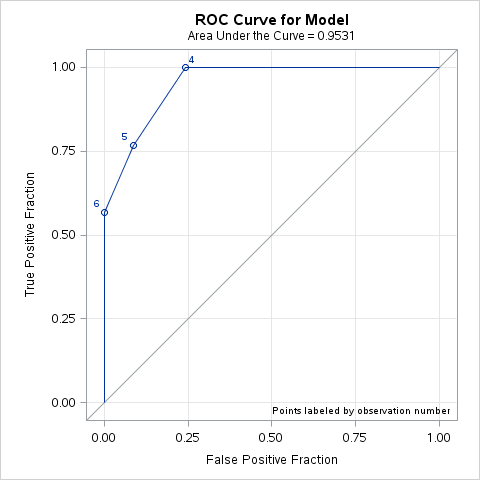

In [3]:
data Data1;
   input disease n age;
   datalines;
 0 14 25
 0 20 35
 0 19 45
 7 18 55
 6 12 65
17 17 75
;
run;

ods graphics on;
%let _ROC_XAXISOPTS_LABEL=False Positive Fraction;
%let _ROC_YAXISOPTS_LABEL=True Positive Fraction;
proc logistic data=Data1 plots(only)=roc(id=obs);
   model disease/n=age / scale=none
                         clparm=wald
                         clodds=pl
                         rsquare;
   units age=10;
   effectplot;
   ods select ROCCurve;
run;
%symdel _ROC_XAXISOPTS_LABEL _ROC_YAXISOPTS_LABEL;

The lefthand edge of this ROC curve is close to top left corner of the plot and far from the center diagonal line. The $AUC = 0.9531$, which means that this model is very good.

[(back to top)](#Table-of-Contents:)

### Logistic Regression Example in SAS

SAS has many different procedures to perform logistic regression (`PROC LOGISTIC`, `PROC GLM`, and `PROC GENMOD` to name a few). For this document, we will be looking at `PROC LOGISTIC`.

Let's use the Fisher Iris dataset found in `SASHELP.IRIS` and try and classify the data into "Setosa" and "Virginica" species by using the sepal length of each individual sample alone.

Running `PROC LOGISTIC`, we get:


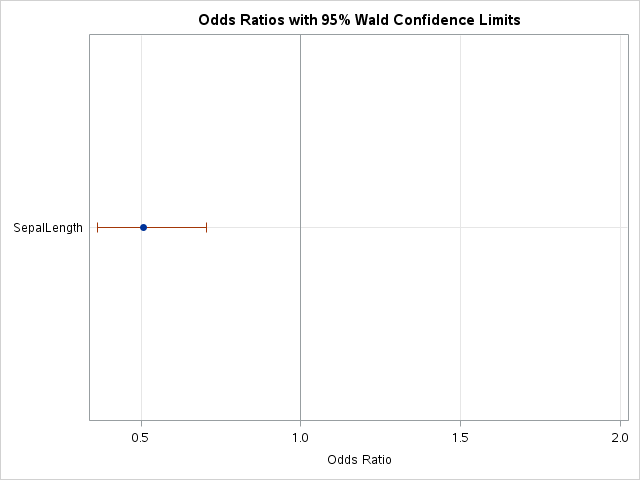
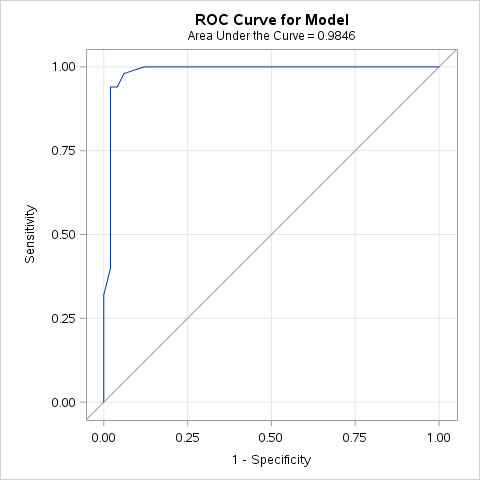
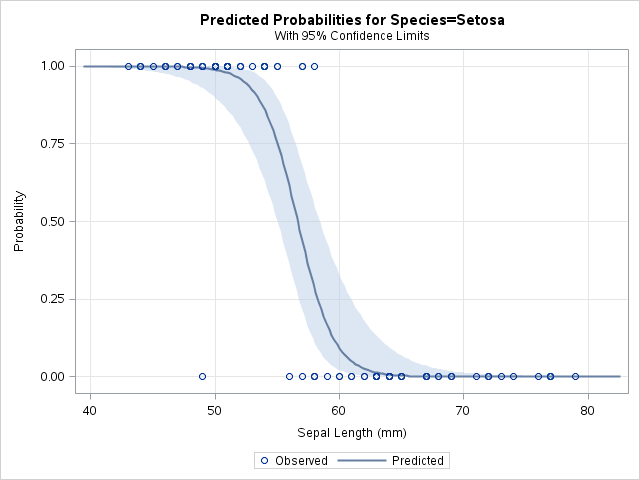

In [50]:
ods graphics on;
proc logistic data = sashelp.iris (where = (species ~= "Versicolor"))  plots(only) = (EffectPlot ORPLOT ROCCURVE);
    class species;
    model species = sepallength;
    ods select ConvergenceStatus FitStatistics ParameterEstimates OddsRatios EffectPlot OrPlot ROCCurve;
    ods show;
run;
ods graphics off;

First, it is important to note that the convergence criterion is satisfied for MLE:

In [53]:
proc logistic data = sashelp.iris (where = (species ~= "Versicolor"))  plots = none;
    class species;
    model species = sepallength;
    ods select ConvergenceStatus;
    ods show;
run;

Model Convergence Status
Convergence criterion (GCONV=1E-8) satisfied.


Otherwise, the model would not have been fitted and the feature variables would need to be adjusted accordingly.

Looking at the model fit criteria:

In [52]:
proc logistic data = sashelp.iris (where = (species ~= "Versicolor"))  plots = none;
    class species;
    model species = sepallength;
    ods select FitStatistics;
    ods show;
run;

it becomes obvious that the model fits very well. The AIC and negative log-likelihood both decrease with the inclusion of the `sepallength` variable, meaning that the variable significantly predicts whether a sample is "Setosa" or "Virginica."

This is confirmed through the parameter estimates:

In [54]:
proc logistic data = sashelp.iris (where = (species ~= "Versicolor"))  plots = none;
    class species;
    model species = sepallength;
    ods select ParameterEstimates;
    ods show;
run;

Where both the intercept and the `sepallength` variables are significant. The `sepallength` variable has a negative coefficient, meaning that "Setosa" (the classification chosen by SAS to be $1$ in the `PROC LOGISTIC` `class` statement) has, in general, smaller petals than "Virginica." In other words, the `sepallength` value is inversely proportional to the probability that a sample is a "Setosa." Looking at the data, this makes a lot of sense.

Now, let's look at the odds ratio:


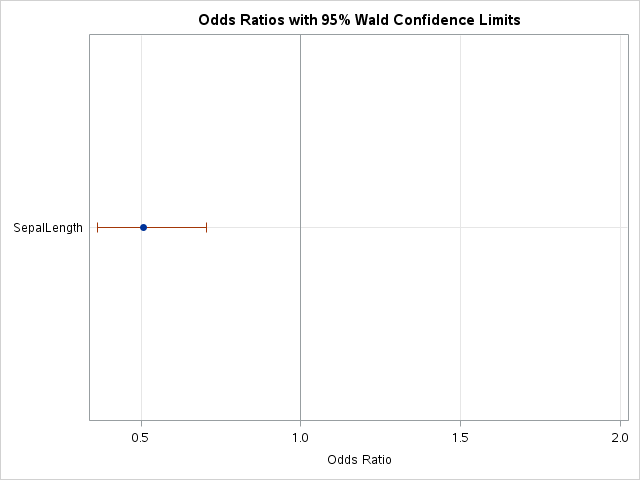

In [55]:
ods graphics on;
proc logistic data = sashelp.iris (where = (species ~= "Versicolor"))  plots(only) = (ORPLOT);
    class species;
    model species = sepallength;
    ods select OddsRatios OrPlot;
    ods show;
run;
ods graphics off;

The odds ratio and its confidence interval is below $1.0$, meaning that an increase in sepal length would decrease the chances of an observation being part of the "Setosa" species.

Examining the ROC curve:


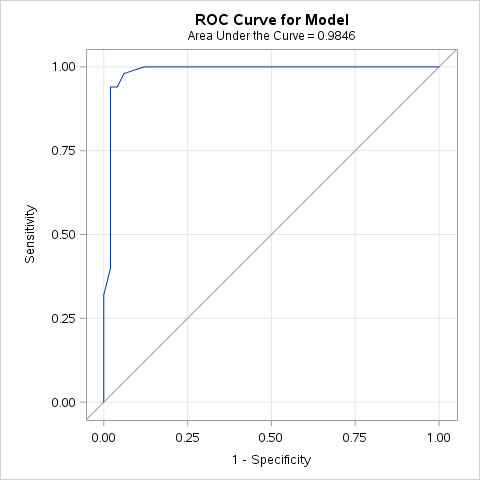

In [56]:
ods graphics on;
proc logistic data = sashelp.iris (where = (species ~= "Versicolor"))  plots(only) = (ROCCURVE);
    class species;
    model species = sepallength;
    ods select ROCCurve;
    ods show;
run;
ods graphics off;

This model has a ROC curve that's pretty close to the top left corner of the plot, along with an $AUC = 0.9846$. That means that it is able to predict true positives and true negatives well.

Let's look at the generated probability curve:


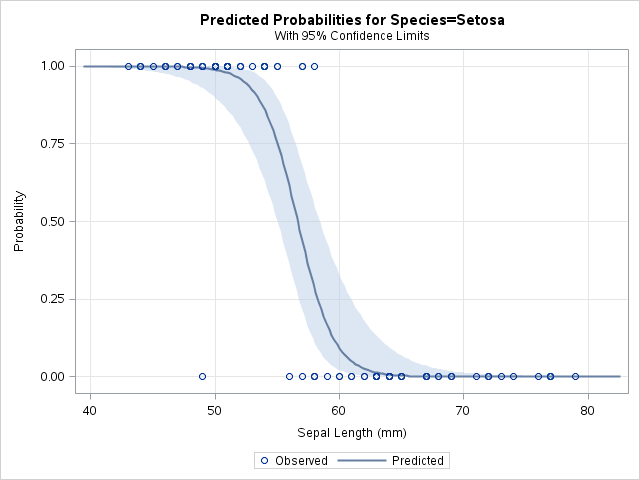

In [57]:
ods graphics on;
proc logistic data = sashelp.iris (where = (species ~= "Versicolor"))  plots(only) = (EffectPlot);
    class species;
    model species = sepallength;
    ods select EffectPlot;
    ods show;
run;
ods graphics off;

This is a display of the probability that a sample is "Setosa" based on the sepal length alone. It is evident that the dividing line for sepal length between "Setosa" and "Virginica" is somewhere around $57$ mm. Anything greater than that is considered by SAS to be "Virginica" while anything less than that is labeled "Setosa."

The true species for each observation given its sepal length is shown as a scatter point for each sample. The scatter points found on the $probability = 1.00$ line are all the observations in which the true label is "Setosa," while those found on the $probability = 0.00$ line are all the observations in which the true label is "Virginica."

It is clear that the logistic regression predicted the labels for some samples incorrectly. The sample with a sepal length of $49$ mm (scatter point on bottom left) would have been labeled as a "Setosa" despite the fact that it was really a "Virginica." This confirms our findings from the ROC curve and odds ratio analysis.

[(back to top)](#Table-of-Contents:)

### Summary

In this document, we learned:
* what the logistic function is
* the relationship between logistic regression and linear regression
* what an odds ratio is
* how to read a ROC curve
* how to run a logistic regression in SAS

Key equations:
* $p \left(\widehat{y} \right) = \frac{1}{1 + e^{-\widehat{y}}}$
* $OR = \frac{\frac{p \left(y + 1 \right)}{1 - p \left(y + 1 \right)}}{\frac{p \left(y \right)}{1 - p \left(y \right)}}$
* $TPR = \frac{TP}{TP + FN}$
* $FPR = \frac{FP}{FP + TN} = 1 - TNR$

New SAS procedures:
* PROC LOGISTIC

[(back to top)](#Table-of-Contents:)

### Citations

[1] J. L. Devore, “Simple Linear Regression and Correlation,” in *Probability and Statistics for Engineering and the Sciences*, 8th ed. Boston, USA: Brooks/Cole, 2012, ch. 12, sec. 1, pp. 473.

[2] R. E. Walpole, R. H. Myers, S. L. Myers, K. Ye, in *Probability & Statistics for Engineers & Scientists*, 9th ed. Boston, USA: Pearson Education, Inc., 2012, ch. 11, sec. 4-6, pp. 400-413.

[(back to top)](#Table-of-Contents:)